In [1]:
import random
import numpy as np 
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 25)

c:\Users\14708\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\14708\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\14708\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
main_df = pd.read_csv(r'C:\Users\14708\TMC\Tata-Motors--Consumer-Favorability-Analysis\twitter_data.csv')
df = main_df.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          809 non-null    object 
 1   URL           809 non-null    object 
 2   Hit Sentence  809 non-null    object 
 3   Source        809 non-null    object 
 4   Influencer    809 non-null    object 
 5   Country       809 non-null    object 
 6   Language      809 non-null    object 
 7   Reach         809 non-null    float64
 8   Sentiment     809 non-null    object 
 9   State         809 non-null    object 
 10  label         809 non-null    object 
 11  day           809 non-null    int64  
 12  hour          809 non-null    int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 82.3+ KB


In [4]:
df.head()

,Date,URL,Hit Sentence,Source,Influencer,Country,Language,Reach,Sentiment,State,label,day,hour
0,2023-09-28 13:24:00,http://twitter.com/automobilindia8/statuses/17...,Engine Fire-Related Risks Force Kia & Hyundai ...,Twitter,@automobilindia8,India,English,2.0,Neutral,Karnataka,hyundai,28,13
1,2023-09-28 13:22:00,http://twitter.com/MalakpetD/statuses/17073021...,"@srinualavilli @BMTC_BENGALURU Mahindra, Tata,...",Twitter,@MalakpetD,India,English,506.0,Neutral,Telangana,tata,28,13
2,2023-09-28 12:23:00,http://twitter.com/DwarakaHyundai/statuses/170...,Rev up your week with unbeatable deals on Hyun...,Twitter,@DwarakaHyundai,India,English,55.0,Positive,Telangana,hyundai,28,12
3,2023-09-28 11:52:00,http://twitter.com/Oneindia/statuses/170727971...,Why Hyundai And Kia Are Recalling 34 Lakh Vehi...,Twitter,@Oneindia,India,English,66383.0,Neutral,Tamil Nadu,hyundai,28,11
4,2023-09-28 10:59:00,http://twitter.com/aditya_kondawar/statuses/17...,"4/n For many of its early years in the U.S., K...",Twitter,@aditya_kondawar,India,English,104111.0,Positive,Maharashtra,hyundai,28,10


In [5]:
df.tail()

,Date,URL,Hit Sentence,Source,Influencer,Country,Language,Reach,Sentiment,State,label,day,hour
804,2023-09-12 12:38:00,http://twitter.com/AstroCounselKK/statuses/170...,QT @REDBOXINDIA: Most of auto companies have a...,Twitter,@AstroCounselKK,India,English,17173.0,Negative,Karnataka,tata,12,12
805,2023-09-12 12:09:00,http://twitter.com/srtxt7/statuses/17014857839...,QT @REDBOXINDIA: more liability on cars 😂 ; BI...,Twitter,@srtxt7,India,English,1148.0,Negative,Delhi,tata,12,12
806,2023-09-12 10:41:00,http://twitter.com/ShivamS21508746/statuses/17...,@RahulSh36397037 @TataMotors @narendramodi @RN...,Twitter,@ShivamS21508746,India,English,8.0,Positive,Delhi,tata,12,10
807,2023-09-12 08:30:00,http://twitter.com/DcpRjnrzone/statuses/170143...,#pressmeet MOKILA Police & SOT RAJENDRANAGAR s...,Twitter,@DcpRjnrzone,India,English,61.0,Neutral,Rajasthan,tata,12,8
808,2023-09-12 02:44:00,http://twitter.com/poojashah0998/statuses/1701...,RT @ShamsNaqvi: One of the most awaited cars t...,Twitter,@poojashah0998,India,English,45.0,Positive,Maharashtra,tata,12,2


In [6]:
sentiment_keywords = {'Neutral':0, 'Negative':-1, 'Positive':1}
df['sentiment_score'] = df['Sentiment'].map(sentiment_keywords)

In [7]:
df.columns

Index(['Date', 'URL', 'Hit Sentence', 'Source', 'Influencer', 'Country',
       'Language', 'Reach', 'Sentiment', 'State', 'label', 'day', 'hour',
       'sentiment_score'],
      dtype='object')

In [8]:
cat_cols = df.select_dtypes('object').columns
num_cols = df.select_dtypes(include=np.number).columns

In [9]:
cat_cols

Index(['Date', 'URL', 'Hit Sentence', 'Source', 'Influencer', 'Country',
       'Language', 'Sentiment', 'State', 'label'],
      dtype='object')

In [10]:
def plot_categorical_distribution(dataframe):
    categorical_columns = ['Source', 'Country', 'Language', 'Sentiment', 'State', 'label']
    
    num_cols = len(categorical_columns)
    num_rows = (num_cols + 1) // 2

    # Increase the width of subplots by modifying the figsize parameter
    fig, axes = plt.subplots(num_rows, 2, figsize=(16, num_rows * 4))

    if num_rows == 1:
        axes = axes.flatten()
    
    for i, column in enumerate(categorical_columns):
        row, col = divmod(i, 2)
        
        ax = axes[row, col]  # Access the specific subplot in the grid
        ax.set_title(f'Distribution of {column}')
        sns.countplot(data=dataframe, x=column, order=dataframe[column].value_counts().index, ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    for i in range(num_cols, num_rows * 2):
        fig.delaxes(axes.flatten()[i])
    
    plt.tight_layout()
    plt.show()

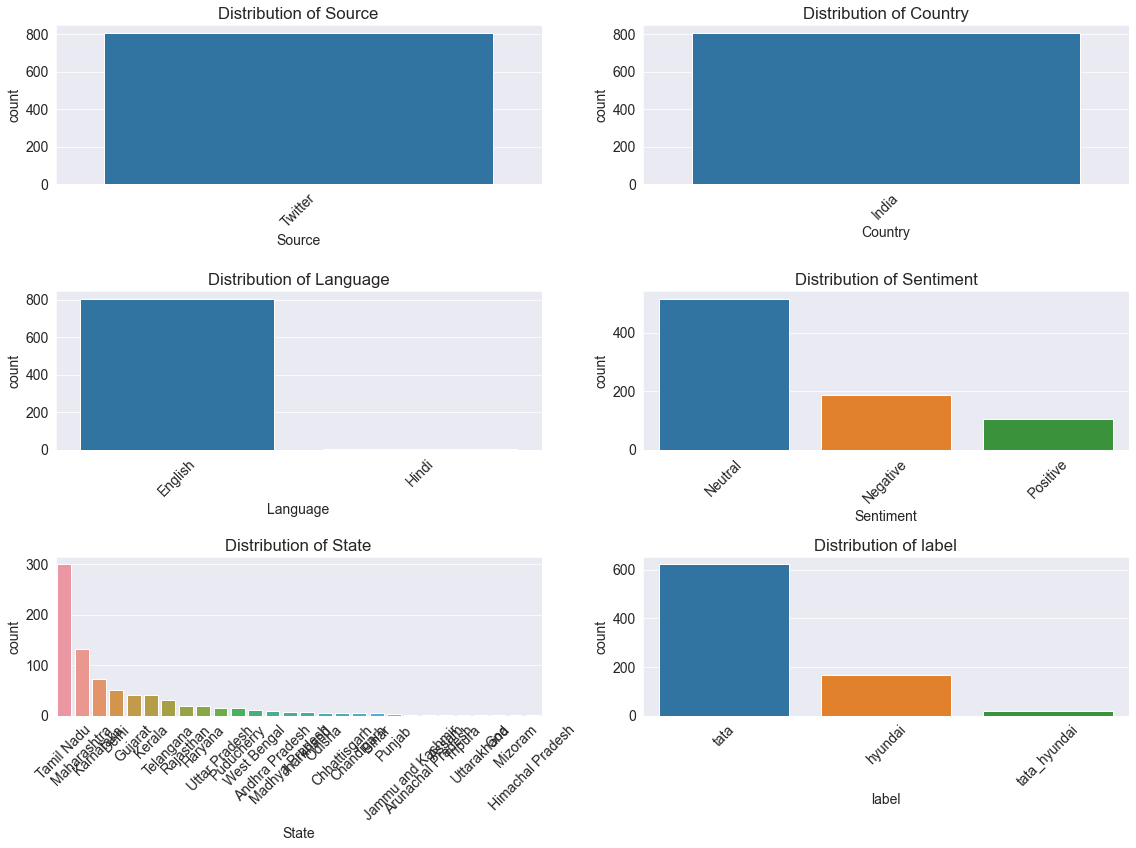

In [11]:
plot_categorical_distribution(df)

In [12]:
def map_sentiment_score_to_label(sentiment_score):
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis based on 'Sentiment Score' column
df['Sentiment Analysis'] = df['sentiment_score'].apply(map_sentiment_score_to_label)

df

,Date,URL,Hit Sentence,Source,Influencer,Country,Language,Reach,Sentiment,State,label,day,hour,sentiment_score,Sentiment Analysis
0,2023-09-28 13:24:00,http://twitter.com/automobilindia8/statuses/17...,Engine Fire-Related Risks Force Kia & Hyundai ...,Twitter,@automobilindia8,India,English,2.0,Neutral,Karnataka,hyundai,28,13,0,Neutral
1,2023-09-28 13:22:00,http://twitter.com/MalakpetD/statuses/17073021...,"@srinualavilli @BMTC_BENGALURU Mahindra, Tata,...",Twitter,@MalakpetD,India,English,506.0,Neutral,Telangana,tata,28,13,0,Neutral
2,2023-09-28 12:23:00,http://twitter.com/DwarakaHyundai/statuses/170...,Rev up your week with unbeatable deals on Hyun...,Twitter,@DwarakaHyundai,India,English,55.0,Positive,Telangana,hyundai,28,12,1,Positive
3,2023-09-28 11:52:00,http://twitter.com/Oneindia/statuses/170727971...,Why Hyundai And Kia Are Recalling 34 Lakh Vehi...,Twitter,@Oneindia,India,English,66383.0,Neutral,Tamil Nadu,hyundai,28,11,0,Neutral
4,2023-09-28 10:59:00,http://twitter.com/aditya_kondawar/statuses/17...,"4/n For many of its early years in the U.S., K...",Twitter,@aditya_kondawar,India,English,104111.0,Positive,Maharashtra,hyundai,28,10,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,2023-09-12 12:38:00,http://twitter.com/AstroCounselKK/statuses/170...,QT @REDBOXINDIA: Most of auto companies have a...,Twitter,@AstroCounselKK,India,English,17173.0,Negative,Karnataka,tata,12,12,-1,Negative
805,2023-09-12 12:09:00,http://twitter.com/srtxt7/statuses/17014857839...,QT @REDBOXINDIA: more liability on cars 😂 ; BI...,Twitter,@srtxt7,India,English,1148.0,Negative,Delhi,tata,12,12,-1,Negative
806,2023-09-12 10:41:00,http://twitter.com/ShivamS21508746/statuses/17...,@RahulSh36397037 @TataMotors @narendramodi @RN...,Twitter,@ShivamS21508746,India,English,8.0,Positive,Delhi,tata,12,10,1,Positive
807,2023-09-12 08:30:00,http://twitter.com/DcpRjnrzone/statuses/170143...,#pressmeet MOKILA Police & SOT RAJENDRANAGAR s...,Twitter,@DcpRjnrzone,India,English,61.0,Neutral,Rajasthan,tata,12,8,0,Neutral


In [13]:
hyundai_data = df[df['label'] == 'hyundai']
tata_data = df[df['label'] == 'tata']

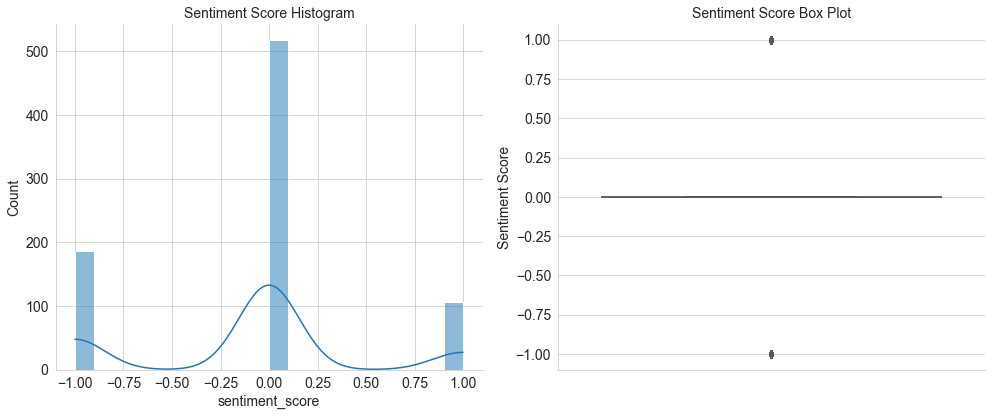

In [23]:
# Creating a figure with subplots
sns.set_style('whitegrid')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data=df, x='sentiment_score', bins=20, kde=True, ax=ax1, palette='viridis')
ax1.set_title('Sentiment Score Histogram', fontsize=14)

sns.boxplot(data=df, y='sentiment_score', ax=ax2, palette='Set2')
ax2.set_title('Sentiment Score Box Plot', fontsize=14)

ax2.set(ylabel='Sentiment Score')

sns.despine()

plt.tight_layout()
plt.show()

In [22]:
# Summary statistics for 'Sentiment Score' column
sentiment_score_stats = df['sentiment_score'].describe()

# Distribution of 'Sentiment Score'
sentiment_score_distribution = df['sentiment_score'].value_counts()

# Mean sentiment score
mean_sentiment_score = df['sentiment_score'].mean()

# Median sentiment score
median_sentiment_score = df['sentiment_score'].median()

print("Summary Statistics for 'Sentiment Score':")
print(sentiment_score_stats)

print("\nDistribution of 'Sentiment Score':")
print(sentiment_score_distribution)

print(f"\nMean Sentiment Score: {mean_sentiment_score}")
print(f"Median Sentiment Score: {median_sentiment_score}")

Summary Statistics for 'Sentiment Score':
count    809.000000
mean      -0.098888
std        0.592955
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: sentiment_score, dtype: float64

Distribution of 'Sentiment Score':
 0    517
-1    186
 1    106
Name: sentiment_score, dtype: int64

Mean Sentiment Score: -0.09888751545117429
Median Sentiment Score: 0.0


## Consumer Perception:

### Tata

In [14]:
average_sentiment_score = tata_data['sentiment_score'].mean()

def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

tata_data['Sentiment Category'] = tata_data['sentiment_score'].apply(categorize_sentiment)

average_reach = tata_data['Reach'].mean()

sentiment_counts = tata_data['Sentiment Category'].value_counts()

print(f"Average Sentiment Score for Tata cars: {average_sentiment_score:.2f}")
print(f"Average Reach for Tata cars: {average_reach:.2f}")
print("\nSentiment Category Counts:")
print(sentiment_counts)

Average Sentiment Score for Tata cars: -0.08
Average Reach for Tata cars: 2317.23

Sentiment Category Counts:
Neutral     434
Negative    119
Positive     68
Name: Sentiment Category, dtype: int64


C:\Users\14708\AppData\Local\Temp\ipykernel_11156\3429287003.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tata_data['Sentiment Category'] = tata_data['sentiment_score'].apply(categorize_sentiment)


In [15]:
def categorize_attribute(sentence):
    if any(keyword in sentence.lower() for keyword in ['safety', 'secure', 'crash', 'protection']):
        return 'Safety'
    elif any(keyword in sentence.lower() for keyword in ['fuel efficiency', 'mileage', 'mpg', 'consumption']):
        return 'Fuel Efficiency'
    elif any(keyword in sentence.lower() for keyword in ['accessories', 'features', 'interior', 'technology']):
        return 'Accessories'
    elif any(keyword in sentence.lower() for keyword in ['electric vehicle', 'ev', 'battery', 'charging']):
        return 'EV'
    elif any(keyword in sentence.lower() for keyword in ['performance', 'speed', 'acceleration', 'horsepower']):
        return 'Performance'
    elif any(keyword in sentence.lower() for keyword in ['cost', 'price', 'affordable', 'expensive']):
        return 'Cost'
    else:
        return 'Other'

tata_data['Attribute'] = tata_data['Hit Sentence'].apply(categorize_attribute)

average_sentiment = tata_data.groupby('Attribute').agg({'sentiment_score': 'mean', 'Reach': 'sum'}).reset_index()

print(average_sentiment)


     Attribute  sentiment_score     Reach
0  Accessories        -0.166667    1676.0
1         Cost        -0.090909   17763.0
2           EV        -0.207547  598451.0
3        Other        -0.026253  812341.0
4  Performance        -1.000000      39.0
5       Safety        -0.160000    8731.0


C:\Users\14708\AppData\Local\Temp\ipykernel_11156\2669460840.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tata_data['Attribute'] = tata_data['Hit Sentence'].apply(categorize_attribute)


### Hyundai 

In [16]:
average_sentiment_score_hyundai = hyundai_data['sentiment_score'].mean()

def categorize_sentiment_hyundai(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

hyundai_data['Sentiment Category'] = hyundai_data['sentiment_score'].apply(categorize_sentiment_hyundai)

average_reach_hyundai = hyundai_data['Reach'].mean()

sentiment_counts_hyundai = hyundai_data['Sentiment Category'].value_counts()

print(f"Average Sentiment Score for Hyundai cars: {average_sentiment_score_hyundai:.2f}")
print(f"Average Reach for Hyundai cars: {average_reach_hyundai:.2f}")
print("\nSentiment Category Counts for Hyundai:")
print(sentiment_counts_hyundai)


Average Sentiment Score for Hyundai cars: -0.21
Average Reach for Hyundai cars: 83899.29

Sentiment Category Counts for Hyundai:
Neutral     75
Negative    64
Positive    29
Name: Sentiment Category, dtype: int64


C:\Users\14708\AppData\Local\Temp\ipykernel_11156\1276570820.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyundai_data['Sentiment Category'] = hyundai_data['sentiment_score'].apply(categorize_sentiment_hyundai)


In [17]:
def categorize_attribute(sentence):
    if any(keyword in sentence.lower() for keyword in ['safety', 'secure', 'crash', 'protection']):
        return 'Safety'
    elif any(keyword in sentence.lower() for keyword in ['fuel efficiency', 'mileage', 'mpg', 'consumption']):
        return 'Fuel Efficiency'
    elif any(keyword in sentence.lower() for keyword in ['accessories', 'features', 'interior', 'technology']):
        return 'Accessories'
    elif any(keyword in sentence.lower() for keyword in ['electric vehicle', 'ev', 'battery', 'charging']):
        return 'EV'
    elif any(keyword in sentence.lower() for keyword in ['performance', 'speed', 'acceleration', 'horsepower']):
        return 'Performance'
    elif any(keyword in sentence.lower() for keyword in ['cost', 'price', 'affordable', 'expensive']):
        return 'Cost'
    else:
        return 'Other'

hyundai_data['Attribute'] = hyundai_data['Hit Sentence'].apply(categorize_attribute)

average_sentiment_hyundai = hyundai_data.groupby('Attribute').agg({'sentiment_score': 'mean', 'Reach': 'sum'}).reset_index()

print(average_sentiment_hyundai)


         Attribute  sentiment_score       Reach
0      Accessories         0.000000      1184.0
1             Cost         0.000000      6128.0
2               EV        -0.137931     87363.0
3  Fuel Efficiency         1.000000      3414.0
4            Other        -0.238095  13969460.0
5      Performance        -1.000000       908.0
6           Safety        -0.333333     26623.0


C:\Users\14708\AppData\Local\Temp\ipykernel_11156\1250975683.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyundai_data['Attribute'] = hyundai_data['Hit Sentence'].apply(categorize_attribute)


## Comparision

C:\Users\14708\AppData\Local\Temp\ipykernel_11156\3261119609.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tata_hyundai_data['Attribute'] = tata_hyundai_data['Hit Sentence'].apply(categorize_attribute)


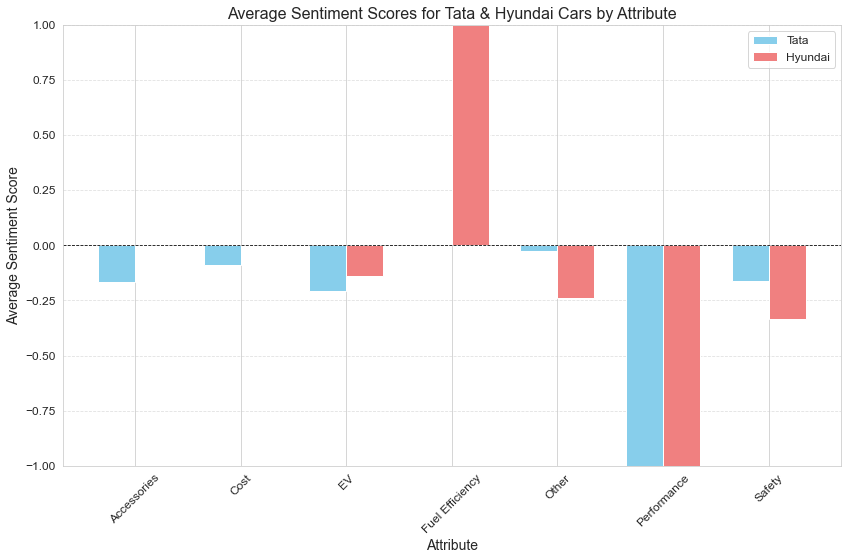

In [20]:
''' Analyzing and Categorizing Average Sentiment Scores for Tata Cars with a Focus on Attributes Including 
Safety, Fuel Efficiency, Accessories, and ICE vs. EV '''

tata_hyundai_data = df[df['label'].isin(['tata', 'hyundai'])]

# Create a new column 'Attribute' based on the 'Hit Sentence' content
def categorize_attribute(sentence):
    if any(keyword in sentence.lower() for keyword in ['safety', 'secure', 'crash', 'protection']):
        return 'Safety'
    elif any(keyword in sentence.lower() for keyword in ['fuel efficiency', 'mileage', 'mpg', 'consumption']):
        return 'Fuel Efficiency'
    elif any(keyword in sentence.lower() for keyword in ['accessories', 'features', 'interior', 'technology']):
        return 'Accessories'
    elif any(keyword in sentence.lower() for keyword in ['electric vehicle', 'ev', 'battery', 'charging']):
        return 'EV'
    elif any(keyword in sentence.lower() for keyword in ['performance', 'speed', 'acceleration', 'horsepower']):
        return 'Performance'
    elif any(keyword in sentence.lower() for keyword in ['cost', 'price', 'affordable', 'expensive']):
        return 'Cost'
    else:
        return 'Other'

tata_hyundai_data['Attribute'] = tata_hyundai_data['Hit Sentence'].apply(categorize_attribute)

# Group by 'Attribute' and 'label' and calculate the average sentiment score
average_sentiment = tata_hyundai_data.groupby(['Attribute', 'label'])['sentiment_score'].mean().unstack().reset_index()

# Create a beautiful grouped bar chart to compare average sentiment scores
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(average_sentiment['Attribute']))
plt.bar(index, average_sentiment['tata'], bar_width, label='Tata', color='skyblue')
plt.bar([i + bar_width for i in index], average_sentiment['hyundai'], bar_width, label='Hyundai', color='lightcoral')
plt.title("Average Sentiment Scores for Tata & Hyundai Cars by Attribute", fontsize=16)
plt.xlabel("Attribute", fontsize=14)
plt.ylabel("Average Sentiment Score", fontsize=14)
plt.xticks([i + bar_width / 2 for i in index], average_sentiment['Attribute'], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ylim(-1, 1)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

